Sauce:  https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

## The following steps form the basis for any machine learning workflow once we have a problem and model in mind:

1. State the question and determine required data
2. Acquire the data in an accessible format
3. Identify and correct missing data points/anomalies as required
4. Prepare the data for the machine learning model
5. Establish a baseline model that you aim to exceed
6. Train the model on the training data
7. Make predictions on the test data
8. Compare predictions to the known test set targets and calculate performance metrics
9. If performance is not satisfactory, adjust the model, acquire more data, or try a different modeling technique
10. Interpret model and report results visually and numerically

## Load Data

In [1]:
import pandas as pd

PATH = 'data/temps/'

df = pd.read_csv(f'{PATH}temps.csv')
df.head(10)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
5,2016,1,6,Wed,40,44,46.1,51,43,49,48,40
6,2016,1,7,Thurs,44,51,46.2,45,45,49,46,38
7,2016,1,8,Fri,51,45,46.3,48,43,47,46,34
8,2016,1,9,Sat,45,48,46.4,50,46,50,45,47
9,2016,1,10,Sun,48,50,46.5,52,45,48,48,49


In [2]:
df.shape    # missing 18 days...

(348, 12)

## Check for anomalous data

In [3]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


**NOTE:  Need to convert date data into a datetime object for plotting **

In [4]:
dates = pd.to_datetime(df[['year', 'month', 'day']])

In [5]:
df['datetime'] = dates; df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,datetime
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,2016-01-01
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,2016-01-02
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,2016-01-03
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,2016-01-04
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,2016-01-05


In [6]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

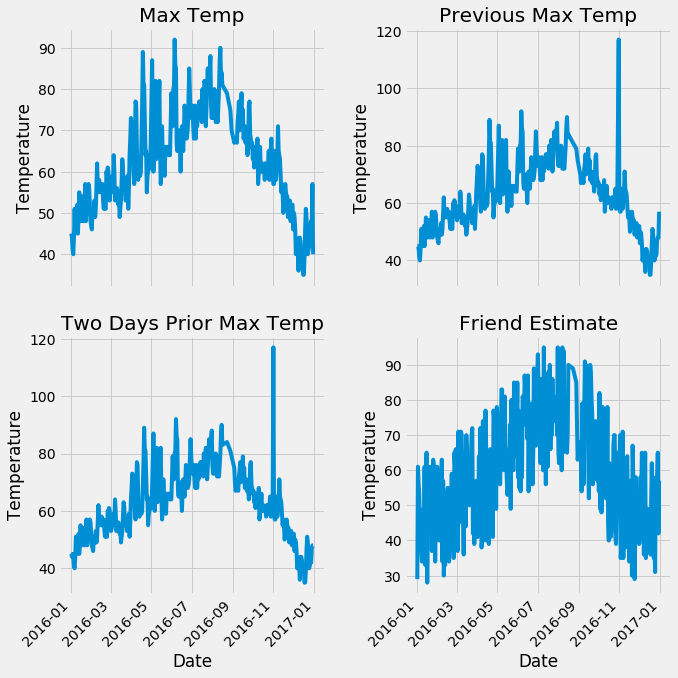

In [7]:
# Set up the plotting layout
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (10,10))
fig.autofmt_xdate(rotation = 45)

# Actual max temperature measurement
ax1.plot(df['datetime'], df['actual'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature'); ax1.set_title('Max Temp')

# Temperature from 1 day ago
ax2.plot(df['datetime'], df['temp_1'])
ax2.set_xlabel(''); ax2.set_ylabel('Temperature'); ax2.set_title('Previous Max Temp')

# Temperature from 2 days ago
ax3.plot(df['datetime'], df['temp_2'])
ax3.set_xlabel('Date'); ax3.set_ylabel('Temperature'); ax3.set_title('Two Days Prior Max Temp')

# Friend Estimate
ax4.plot(df['datetime'], df['friend'])
ax4.set_xlabel('Date'); ax4.set_ylabel('Temperature'); ax4.set_title('Friend Estimate')

plt.tight_layout(pad=2)

In [8]:
# looks like a significant outlier in prior max temps.  probably should remove those...
df.drop(df['temp_2'].idxmax(), axis=0, inplace=True)
df.drop(df['temp_1'].idxmax(), axis=0, inplace=True)

In [12]:
# reset index
df.reset_index(drop=True, inplace=True)

Text(0.5,1,'Two Days Prior Max Temp')

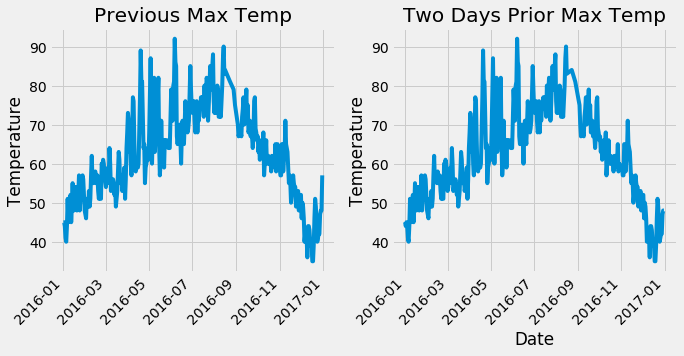

In [10]:
fig, ((ax2, ax3)) = plt.subplots(nrows=1, ncols=2, figsize = (10,5))
fig.autofmt_xdate(rotation = 45)

# Temperature from 1 day ago
ax2.plot(df['datetime'], df['temp_1'])
ax2.set_xlabel(''); ax2.set_ylabel('Temperature'); ax2.set_title('Previous Max Temp')

# Temperature from 2 days ago
ax3.plot(df['datetime'], df['temp_2'])
ax3.set_xlabel('Date'); ax3.set_ylabel('Temperature'); ax3.set_title('Two Days Prior Max Temp')

Looking much better...

## Data Preparation

### One Hot encode categorical variables
--> pd.get_dummies

In [13]:
df = pd.get_dummies(df)
df.head()

,index,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,datetime,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,0,2016,1,1,45,45,45.6,45,43,50,44,29,2016-01-01,1,0,0,0,0,0,0
1,1,2016,1,2,44,45,45.7,44,41,50,44,61,2016-01-02,0,0,1,0,0,0,0
2,2,2016,1,3,45,44,45.8,41,43,46,47,56,2016-01-03,0,0,0,1,0,0,0
3,3,2016,1,4,44,41,45.9,40,44,48,46,53,2016-01-04,0,1,0,0,0,0,0
4,4,2016,1,5,41,40,46.0,44,46,46,46,41,2016-01-05,0,0,0,0,0,1,0


### Handle cyclical features
**(e.g. hour 23 should be next to hour 0)  Convert into points on a circle via sin/cos**

In [17]:
import numpy as np

# df['hr_sin'] = np.sin(df.hr*(2.*np.pi/24))
# df['hr_cos'] = np.cos(df.hr*(2.*np.pi/24))
df['month_sin'] = np.sin((df.month-1)*(2.*np.pi/12))
df['month_cos'] = np.cos((df.month-1)*(2.*np.pi/12))

### Separate target from dataframe

In [19]:
# targets as array
targets = np.array(df['actual'])

# dataframe without targets (and removed unneccesary columns)
df = df.drop('actual', axis=1)

# save feature names as a list
features = list(df.columns)

# convert to array
df = np.array(df)

### Split training/testing sets

In [20]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(df, targets, test_size = 0.25, random_state = 42)

In [21]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (259, 18)
Training Labels Shape: (259,)
Testing Features Shape: (87, 18)
Testing Labels Shape: (87,)


## Establish Baseline

In [22]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, features.index('average')]

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2), 'degrees.')

Average baseline error:  5.83 degrees.


## Train Model

In [23]:
from sklearn.ensemble import RandomForestRegressor

# instantiate model
rf = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)  # same random state as above

rf.fit(train_features, train_labels);

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

## Make predictions on test data

In [24]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors  -  some will be higher, some lower
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.95 degrees.


## Performance Metrics

In [25]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Percent Accuracy:', round(accuracy, 2))

Percent Accuracy: 93.84


## Tune hyperparameters to improve performance

In [26]:
rf_new = RandomForestRegressor(n_estimators = 100, criterion = 'mse', max_depth = None, 
                               min_samples_split = 2, min_samples_leaf = 1)

rf_new.fit(train_features, train_labels);

predictions = rf_new.predict(test_features)

errors = abs(predictions - test_labels)

print('Mean Absolute Error: ', round(np.mean(errors), 2), 'degrees.')

mape = 100 * (errors / test_labels)

accuracy = 100 - np.mean(mape)
print('Percent Accuracy:', round(accuracy, 2))

Mean Absolute Error:  3.98 degrees.
Percent Accuracy: 93.8


## Interpret Results

### Visualizing Single Decision Tree

In [27]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

In [29]:
# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = features, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png')

AttributeError: 'list' object has no attribute 'write_png'

In [ ]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = features, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png')

## Variable importances

In [33]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp_1               Importance: 0.57
Variable: average              Importance: 0.22
Variable: forecast_acc         Importance: 0.06
Variable: forecast_noaa        Importance: 0.04
Variable: day                  Importance: 0.02
Variable: temp_2               Importance: 0.02
Variable: forecast_under       Importance: 0.02
Variable: friend               Importance: 0.02
Variable: month_cos            Importance: 0.01
Variable: year                 Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0
Variable: month_sin            Importance: 0.0


## Model w/ 2 most important features

In [35]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Extract the two most important features
important_indices = [features.index('temp_1'), features.index('average')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, train_labels)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)

errors = abs(predictions - test_labels)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape

print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 4.47 degrees.
Accuracy: 93.02 %.


## Visualizations

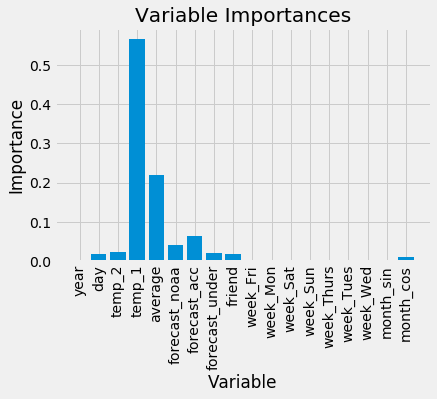

In [37]:
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, features, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [39]:
# Dates of training values
months = features[:, features.index('month')]
days = features[:, features.index('day')]
years = features[:, features.index('year')]

# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

# Dates of predictions
months = test_features[:, features.index('month')]
days = test_features[:, features.index('day')]
years = test_features[:, features.index('year')]

# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]

# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})

ValueError: 'month' is not in list

In [ ]:
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')

# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');


In [ ]:
# Make the data accessible for plotting
true_data['temp_1'] = features[:, feature_list.index('temp_1')]
true_data['average'] = features[:, feature_list.index('average')]
true_data['friend'] = features[:, feature_list.index('friend')]

# Plot all the data as lines
plt.plot(true_data['date'], true_data['actual'], 'b-', label  = 'actual', alpha = 1.0)
plt.plot(true_data['date'], true_data['temp_1'], 'y-', label  = 'temp_1', alpha = 1.0)
plt.plot(true_data['date'], true_data['average'], 'k-', label = 'average', alpha = 0.8)
plt.plot(true_data['date'], true_data['friend'], 'r-', label = 'friend', alpha = 0.3)

# Formatting plot
plt.legend(); plt.xticks(rotation = '60');

# Lables and title
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual Max Temp and Variables');